In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [128]:
pip install pyo

Note: you may need to restart the kernel to use updated packages.


In [129]:
import opendatasets as od

od.download(
    "https://www.kaggle.com/datasets/datazng/telecom-company-churn-rate-call-center-data")

Skipping, found downloaded files in ".\telecom-company-churn-rate-call-center-data" (use force=True to force download)


In [130]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pyo
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report


WxPython is not found for the current python version.
Pyo will use a minimal GUI toolkit written with Tkinter (if available).
This toolkit has limited functionnalities and is no more
maintained or updated. If you want to use all of pyo's
GUI features, you should install WxPython, available here:
http://www.wxpython.org/



In [131]:
#filename
file_CustomerInfo=('Telecom Churn Rate Dataset.xlsx')
file_Call_CentreInfo=('Telecom Company Call-Center-Dataset.xlsx')

In [132]:
def read_data(filename):
    df=pd.read_excel(filename)
    return df

In [133]:
# Read the xlsx file into a dataframe
df_CustomerInfo=read_data(file_CustomerInfo)
df_CustomerInfo.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [134]:
#Descriptive status of the df
def decrip_data(df):
    print(df.info())
    print(df.shape)
    print(df.describe())
    return

In [135]:
decrip_data(df_CustomerInfo)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [136]:
#Data Cleaning

def clean_data(df):

    # drop missing values
    print(df.isna().sum())
    df = df.dropna()
    # Check for duplicates in the entire DataFrame
    duplicates = df.duplicated()
    df.drop_duplicates(inplace=True)
    # Visualize missing values as a matrix
    msno.matrix(df);
    return df
    

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0,0,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0,5,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,0,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,0,0,Yes


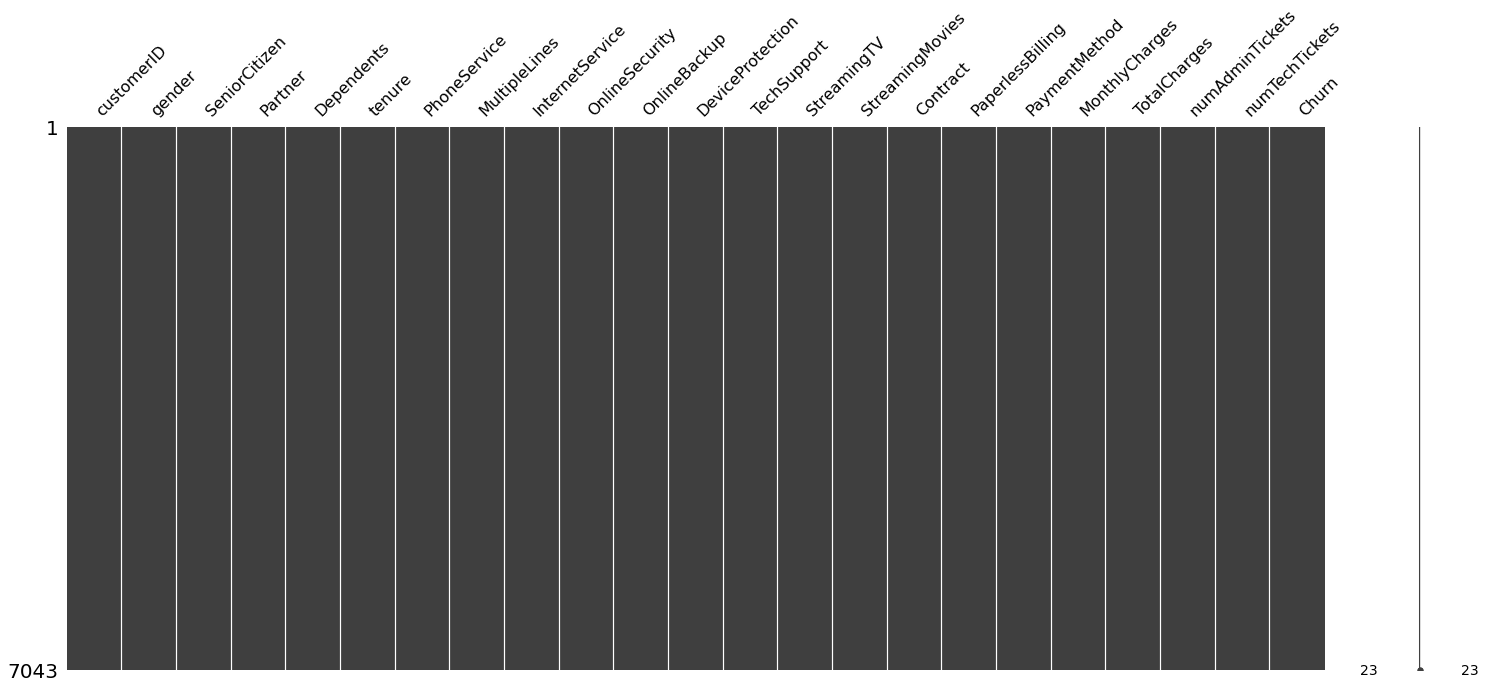

In [137]:
clean_data(df_CustomerInfo)

In [138]:
# Data Manipulation

#df_CustomerInfo = df_CustomerInfo.drop(['customerID'])
# Map values to "No" or "Yes"
df_CustomerInfo["SeniorCitizen"]= df_CustomerInfo["SeniorCitizen"].map({0: "No", 1: "Yes"})
df_CustomerInfo['OnlineSecurity'] = df_CustomerInfo['OnlineSecurity'].replace('No internet service', 'No')
df_CustomerInfo['OnlineBackup'] = df_CustomerInfo['OnlineBackup'].replace('No internet service', 'No')
df_CustomerInfo['DeviceProtection'] = df_CustomerInfo['DeviceProtection'].replace('No internet service', 'No')
df_CustomerInfo['TechSupport'] = df_CustomerInfo['TechSupport'].replace('No internet service', 'No')
df_CustomerInfo['StreamingTV'] = df_CustomerInfo['StreamingTV'].replace('No internet service', 'No')
df_CustomerInfo['StreamingMovies'] = df_CustomerInfo['StreamingMovies'].replace('No internet service', 'No')


df_CustomerInfo['TotalCharges'] = pd.to_numeric(df_CustomerInfo.TotalCharges, errors='coerce')
df_CustomerInfo.isnull().sum()
df_CustomerInfo[np.isnan(df_CustomerInfo['TotalCharges'])]
df_CustomerInfo[df_CustomerInfo['tenure'] == 0].index
df_CustomerInfo.drop(labels=df_CustomerInfo[df_CustomerInfo['tenure'] == 0].index, axis=0, inplace=True)
df_CustomerInfo[df_CustomerInfo['tenure'] == 0].index
df_CustomerInfo.fillna(df_CustomerInfo["TotalCharges"].mean())
df_CustomerInfo.isnull().sum()
df_CustomerInfo.head()
df_CustomerInfo["InternetService"].describe(include=['object', 'bool'])
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_CustomerInfo[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [139]:
#Dataset is clean now

#EDA CustomerInfo

In [142]:
#What is the overall churn rate of the telecom company and how does it vary by customer demographics(e.g gender)
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df_CustomerInfo['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df_CustomerInfo['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.2, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [141]:
df_CustomerInfo["Churn"][df_CustomerInfo["Churn"]=="No"].groupby(by=df_CustomerInfo["gender"]).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [23]:
df_CustomerInfo["Churn"][df_CustomerInfo["Churn"]=="Yes"].groupby(by=df_CustomerInfo["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

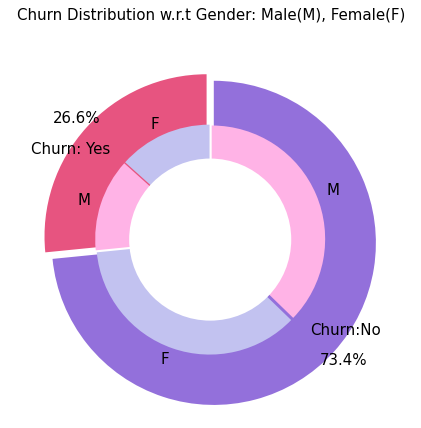

In [24]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors =['#e75480','#9370db']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()


In [25]:
#The overall churn rate of the telecom company is 26.54%. The churn rate varies by customer demographics such as gender, partner status, etc.

#Based on the analysis, the churn rate is higher among female customers (26.92%) compared to male customers (26.16%). The churn rate is also significantly higher among customers who do not have a partner (32.96%) compared to those who have a partner (19.66%).

#There is negligible difference in customer percentage/ count who chnaged the service provider. Both genders behaved in similar fashion when it comes to migrating to another service provider/firm.

In [26]:
df=df_CustomerInfo.copy()

In [27]:
#q2.Which services are most commonly subscribed to by customers?
services = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


df['InternetService'] = df['InternetService'].replace('DSL', 'Yes')
df['InternetService'] = df['InternetService'].replace('Fiber optic', 'Yes')
# create a DataFrame with the service counts
service_counts = {}
for service in services:
    service_counts[service] = df[service].value_counts().to_dict()
df_service_counts = pd.DataFrame(service_counts)

# convert the DataFrame from wide to long format
df_service_counts = df_service_counts.reset_index().rename(columns={'index': 'Subscribed'})
df_service_counts = pd.melt(df_service_counts, id_vars=['Subscribed'], var_name='Services', value_name='Count')

# create a grouped bar chart
fig = px.bar(df_service_counts, x='Services', y='Count', color='Subscribed', 
            # color_discrete_map={'Yes': '#66b3ff', 'No': '#ff6666'},
             title='Service Subscription Count', barmode='group')

fig.update_layout(xaxis_title='Services', yaxis_title='Count')
fig.show()


In [28]:
#Which services are most commonly subscribed to by customers - Phone Service,followed by Internet Service

In [29]:
fig = px.histogram(df_CustomerInfo, x="Contract", color="Churn", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [30]:
#About 75% of customer with Month-to-Month Contract opted to move out as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract

In [31]:
labels = df_CustomerInfo['PaymentMethod'].unique()
values = df_CustomerInfo['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [32]:
fig = px.histogram(df_CustomerInfo, x="PaymentMethod", color="Churn", barmode="group",title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [33]:
#Major customers who moved out were having Electronic Check as Payment Method.
#Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.

In [34]:
df_CustomerInfo["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [35]:
df_CustomerInfo[df_CustomerInfo["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       992
Fiber optic      No       910
No               No       717
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
dtype: int64

In [36]:
df_CustomerInfo[df_CustomerInfo["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       965
Fiber optic      No       889
No               No       690
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
dtype: int64

In [37]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [969, 993, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [691, 722, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

In [38]:
#A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.
#Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

In [39]:
#color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df_CustomerInfo, color="Churn", x="Dependents", barmode="group", title="<b>Dependents distribution</b>"
                  )
#, color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [40]:
#Customers without dependents are more likely to churn

In [41]:
#color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df_CustomerInfo, color="Churn", x="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>"
                  )#, color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [42]:
#Customers that doesn't have partners are more likely to churn

In [43]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df_CustomerInfo, color="Churn", x="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>"
                   #, color_discrete_map=color_map
                  )
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [44]:
#It can be observed that the fraction of senior citizen is very less.
#Most of the senior citizens churn.

In [45]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df_CustomerInfo, color="Churn", x="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>"
                   #, color_discrete_map=color_map
                  )
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [46]:
#Most customers churn in the absence of online security,

In [47]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df_CustomerInfo, color="Churn", x="PaperlessBilling",  title="<b>Chrun distribution w.r.t. Paperless Billing</b>"
                   #, color_discrete_map=color_map
                  )
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [48]:
#Customers with Paperless Billing are most likely to churn.

In [49]:
fig = px.histogram(df_CustomerInfo, color="Churn", x="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [50]:
#Customers with no TechSupport are most likely to migrate to another service provider.

In [51]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df_CustomerInfo, color="Churn", x="PhoneService", title="<b>Chrun distribution w.r.t. Phone Service</b>"
                   #, color_discrete_map=color_map
                  )
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [52]:
#Very small fraction of customers don't have a phone service and out of that, 1/3rd Customers are more likely to churn.

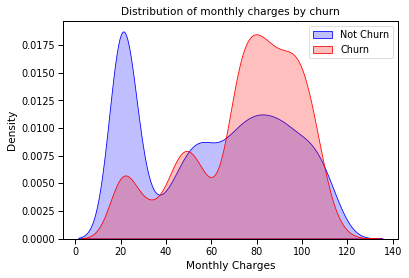

In [53]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df_CustomerInfo.MonthlyCharges[(df_CustomerInfo["Churn"] == 'No') ],
                color="Blue", shade = True);
ax = sns.kdeplot(df_CustomerInfo.MonthlyCharges[(df_CustomerInfo["Churn"] == 'Yes') ],
                ax =ax, color="Red", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

In [54]:
#Customers with higher Monthly Charges are also more likely to churn

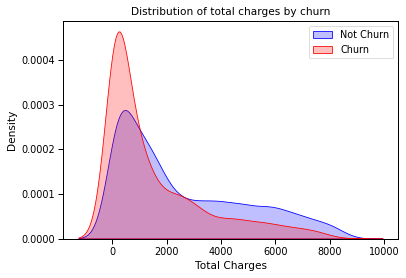

In [55]:
df_CustomerInfo['TotalCharges'] = pd.to_numeric(df_CustomerInfo['TotalCharges'], errors='coerce')

ax = sns.kdeplot(df_CustomerInfo.TotalCharges[(df_CustomerInfo["Churn"] == 'No') ],
                color="Blue", shade = True);
ax = sns.kdeplot(df_CustomerInfo.TotalCharges[(df_CustomerInfo["Churn"] == 'Yes') ],
                ax =ax, color="Red", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

In [56]:
fig = px.box(df_CustomerInfo, x='Churn', y = 'tenure',color='Churn')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

In [57]:
#New customers are more likely to churn

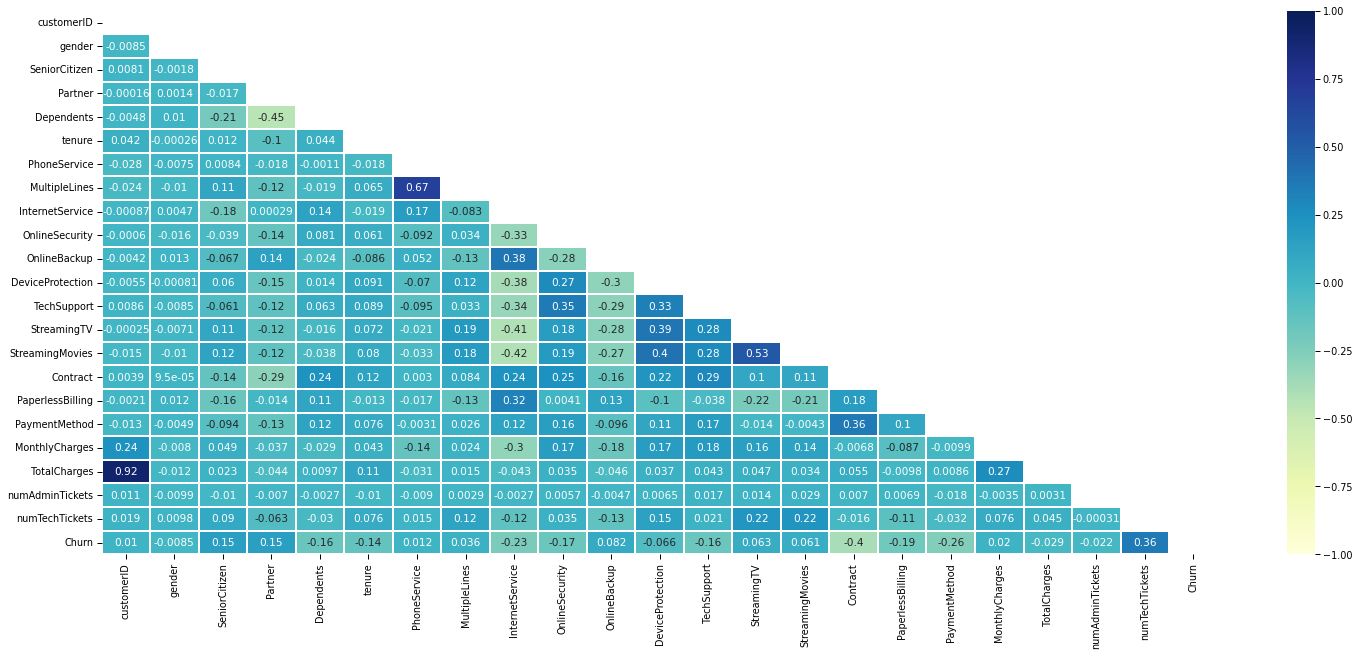

In [58]:
plt.figure(figsize=(25, 10))

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='YlGnBu', vmin=-1, vmax=1)

In [59]:
#The three features that are most positively correlated with Churn are:

#numTechTickets
#Senior Citizen
#Partner
#Online Back

#The features that are most negatively correlated with Churn are:

#Contact
#Payment Method
#PaperlessBilling
#OnlineSecurity
#TechSupport

In [60]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

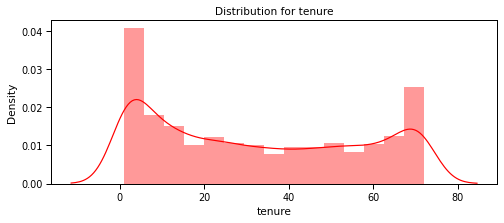

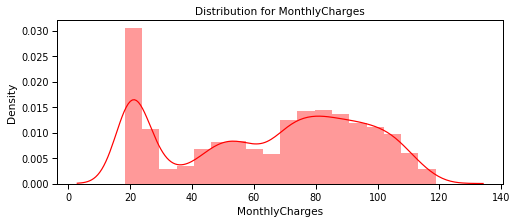

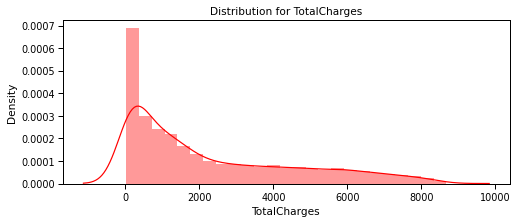

In [61]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df_CustomerInfo)

In [62]:
#Dataset-2

In [63]:
df_Call_CentreInfo=read_data(file_Call_CentreInfo)
df_Call_CentreInfo.head()

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,ID0001,Diane,2021-01-01,09:12:58,Contract related,Y,Y,109.0,00:02:23,3.0
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,Y,N,70.0,00:04:02,3.0
2,ID0003,Stewart,2021-01-01,09:47:31,Contract related,Y,Y,10.0,00:02:11,3.0
3,ID0004,Greg,2021-01-01,09:47:31,Contract related,Y,Y,53.0,00:00:37,2.0
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,00:01:00,3.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Call Id                     5000 non-null   object 
 1   Agent                       5000 non-null   object 
 2   Date                        5000 non-null   object 
 3   Time                        5000 non-null   object 
 4   Topic                       5000 non-null   object 
 5   Answered (Y/N)              5000 non-null   object 
 6   Resolved                    5000 non-null   object 
 7   Speed of answer in seconds  4054 non-null   float64
 8   AvgTalkDuration             4054 non-null   object 
 9   Satisfaction rating         4054 non-null   float64
dtypes: float64(2), object(8)
memory usage: 390.8+ KB
None
(5000, 10)
       Speed of answer in seconds  Satisfaction rating
count                 4054.000000          4054.000000
mean                    67.52

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,ID0001,Diane,2021-01-01,09:12:58,Contract related,Y,Y,109.0,00:02:23,3.0
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,Y,N,70.0,00:04:02,3.0
2,ID0003,Stewart,2021-01-01,09:47:31,Contract related,Y,Y,10.0,00:02:11,3.0
3,ID0004,Greg,2021-01-01,09:47:31,Contract related,Y,Y,53.0,00:00:37,2.0
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,00:01:00,3.0
...,...,...,...,...,...,...,...,...,...,...
4990,ID4991,Stewart,2021-03-31,13:46:34,Streaming,Y,Y,73.0,00:06:26,1.0
4995,ID4996,Jim,2021-03-31,16:37:55,Payment related,Y,Y,22.0,00:05:40,1.0
4996,ID4997,Diane,2021-03-31,16:45:07,Payment related,Y,Y,100.0,00:03:16,3.0
4997,ID4998,Diane,2021-03-31,16:53:46,Payment related,Y,Y,84.0,00:01:49,4.0


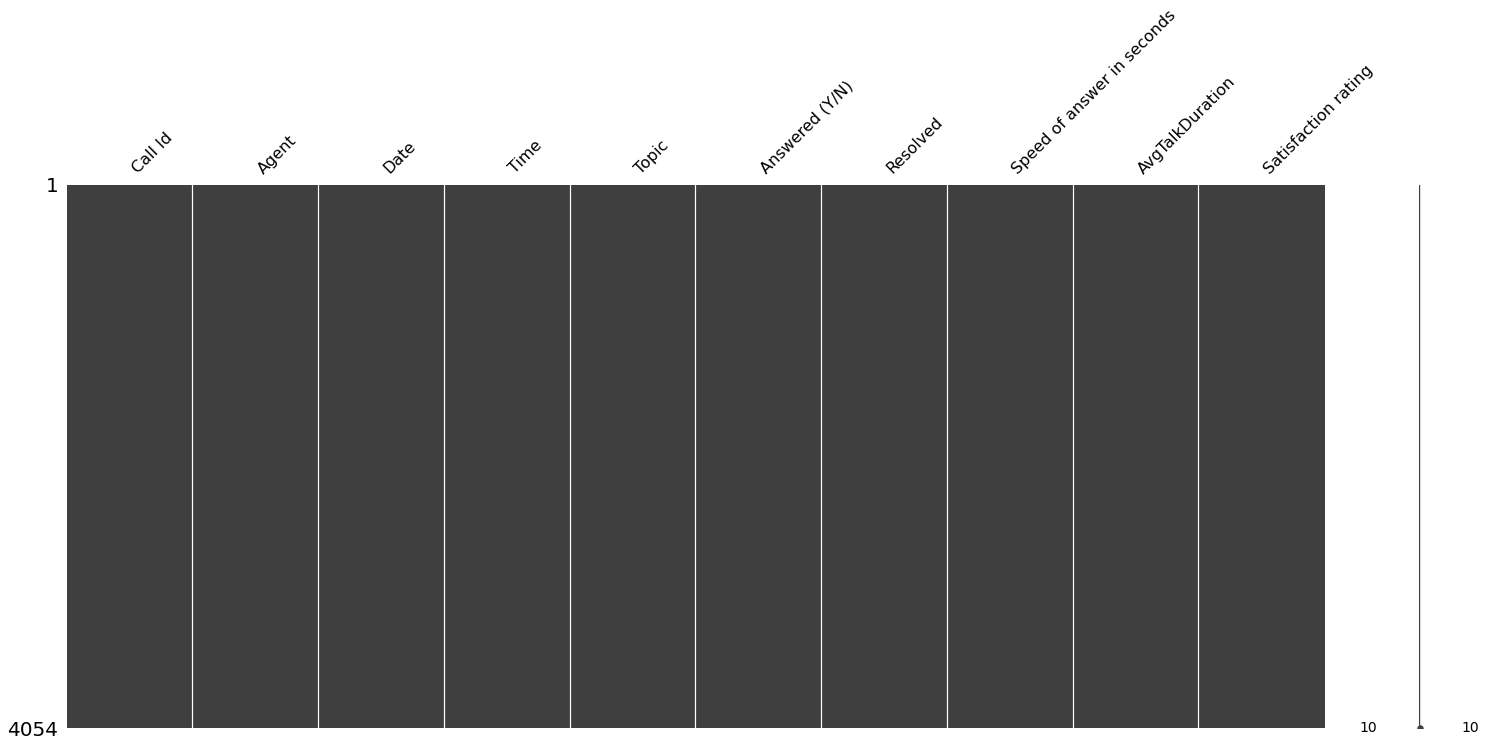

In [64]:
decrip_data(df_Call_CentreInfo)
clean_data(df_Call_CentreInfo)

In [65]:
#What is the overall satisfaction rate of customers?
satisfaction_rate = df_Call_CentreInfo['Satisfaction rating'].mean()
print("Overall satisfaction rate: {:.2f}".format(satisfaction_rate))


Overall satisfaction rate: 3.40


In [66]:
# Group the data by 'Topic' and 'Agent' and calculate the mean satisfaction rating for each group
satisfaction_by_topic = df_Call_CentreInfo.groupby(['Topic'])['Satisfaction rating'].mean()

# Print the results
print(satisfaction_by_topic)

Topic
Admin Support        3.426415
Contract related     3.377693
Payment related      3.396088
Streaming            3.402597
Technical Support    3.414907
Name: Satisfaction rating, dtype: float64


In [67]:
#Based on the data provided, it appears that customers were generally satisfied with all topics, with an average satisfaction rating of around 3.4 to 3.4. Admin Support had the highest satisfaction rating at 3.43, followed by Streaming at 3.40, Technical Support at 3.41, Payment related at 3.40, and Contract related at 3.38.

In [68]:
#q3.Which topics have the highest and lowest resolution rates? 
# Use boolean indexing to extract the rows with resolved == 'Y'
resolved_y = df_Call_CentreInfo[df_Call_CentreInfo['Resolved'] == 'Y']

# Calculate the number of rows for each topic
resolved_y_counts = resolved_y["Topic"].value_counts()

# Print the extracted rows
print(resolved_y_counts)

resolved_n = df_Call_CentreInfo[df_Call_CentreInfo['Resolved'] == 'N']

# Calculate the number of rows for each topic
resolved_n_counts = resolved_n["Topic"].value_counts()

# Print the extracted rows
print(resolved_n_counts)




Streaming            749
Technical Support    736
Payment related      729
Admin Support        723
Contract related     709
Name: Topic, dtype: int64
Technical Support    283
Payment related      278
Streaming            273
Contract related     267
Admin Support        253
Name: Topic, dtype: int64


In [69]:
#Based on the given data, the topic with the highest resolution rate is "Streaming" with 749 resolved out of 800 total, and the topic with the lowest resolution rate is "Contract related" with 709 resolved out of 800 total.
#The result shows the number of unresolved cases for each topic, ordered from highest to lowest. It appears that Technical Support has the highest number of unresolved cases, followed by Payment related, Streaming, Contract related, and Admin Support.

In [70]:

#What is the average speed of answer for different topics and agents?
import plotly.express as px

# Calculate average speed of answer by topic and agent
avg_soa = df_Call_CentreInfo.groupby(['Topic', 'Agent'])['Speed of answer in seconds'].mean().reset_index()

# get the index of the row with the maximum speed for each topic
idx = avg_soa.groupby('Topic')['Speed of answer in seconds'].idxmax()

# get the agent name for each row using the index
result = avg_soa.loc[idx, ['Topic', 'Agent']]

# print the result
print(result)


# Create plotly visualization
fig = px.bar(avg_soa, x='Topic', y='Speed of answer in seconds', color='Agent', title='Average Speed of Answer by Topic and Agent')
fig.show()


                Topic   Agent
6       Admin Support  Martha
13   Contract related     Joe
19    Payment related    Greg
30          Streaming  Martha
37  Technical Support     Joe


In [71]:
#                Topic   Agent
#6       Admin Support  Martha
#13   Contract related     Joe
#19    Payment related    Greg
#30          Streaming  Martha
#37  Technical Support     Joe

In [72]:
#q4.Which agents have the highest and lowest resolution rates?
# Filter the rows with resolved == Y
resolved_df = df_Call_CentreInfo[df_Call_CentreInfo["Resolved"] == "Y"]

# Calculate the number of resolved calls for each agent
resolved_counts = resolved_df["Agent"].value_counts()

# Calculate the total number of calls for each agent
total_counts = df_Call_CentreInfo["Agent"].value_counts()

# Calculate the resolution rate for each agent
resolution_rates = resolved_counts / total_counts

# Sort the agents by resolution rate
sorted_agents = resolution_rates.sort_values()

# Print the agents with the highest and lowest resolution rates
print("Agents with highest resolution rates:")
print(sorted_agents.tail())
print("\nAgents with lowest resolution rates:")
print(sorted_agents.head())


Agents with highest resolution rates:
Stewart    0.728522
Greg       0.729167
Becky      0.732171
Joe        0.735245
Dan        0.744076
Name: Agent, dtype: float64

Agents with lowest resolution rates:
Diane      0.714060
Martha     0.722571
Jim        0.728228
Stewart    0.728522
Greg       0.729167
Name: Agent, dtype: float64


In [73]:
#The agents with the highest resolution rates are listed in decreasing order: Stewart, Greg, Becky, Joe, and Dan. The agents with the lowest resolution rates are listed in increasing order: Diane, Martha, Jim, Stewart (note that this agent appears on both lists), and Greg.

In [74]:
#What is the overall satisfaction rating for calls related to Admin Support?
#What is the overall satisfaction rating for calls related to Tech Support?

# Filter the DataFrame to include only calls related to Admin Support
support_calls = df_Call_CentreInfo[df_Call_CentreInfo['Topic'] == 'Admin Support']

# Calculate the overall satisfaction rating for Admin Support calls
overall_satisfaction_rating = support_calls['Satisfaction rating'].mean()

print("The overall satisfaction rating for calls related to Admin Support is:", overall_satisfaction_rating)

# Filter the DataFrame to include only calls related to Tech Support
support_calls = df_Call_CentreInfo[df_Call_CentreInfo['Topic'] == 'Technical Support']

# Calculate the overall satisfaction rating for Admin Support calls
overall_satisfaction_rating = support_calls['Satisfaction rating'].mean()

print("The overall satisfaction rating for calls related to Tech Support is:", overall_satisfaction_rating)


The overall satisfaction rating for calls related to Admin Support is: 3.4264150943396228
The overall satisfaction rating for calls related to Tech Support is: 3.414906832298137


In [75]:
#The overall satisfaction rating for calls related to Admin Support is: 3.4264150943396228
#The overall satisfaction rating for calls related to Tech Support is: 3.414906832298137

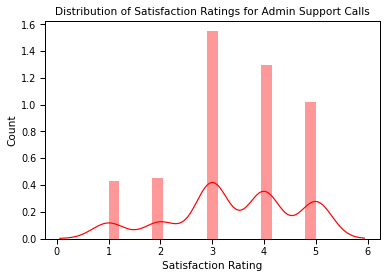

In [76]:
#What is the distribution of satisfaction ratings for calls related to Admin Support? represent using daigram

# Filter the DataFrame to include only calls related to Admin Support
admin_calls = df_Call_CentreInfo[df_Call_CentreInfo['Topic'] == 'Admin Support']

# Create a histogram of the satisfaction ratings for Admin Support calls
#plt.hist(admin_calls['Satisfaction rating'], bins=5, range=(1, 5),color='r')
ax = sns.distplot(admin_calls['Satisfaction rating'], color= 'r')
# Add labels and a title to the plot
plt.xlabel('Satisfaction Rating')
plt.ylabel('Count')
plt.title('Distribution of Satisfaction Ratings for Admin Support Calls')

# Show the plot
plt.show()


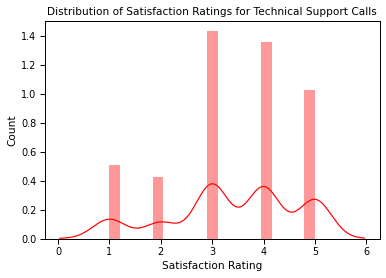

In [77]:
# Filter the DataFrame to include only calls related to Admin Support
admin_calls = df_Call_CentreInfo[df_Call_CentreInfo['Topic'] == 'Technical Support']

# Create a histogram of the satisfaction ratings for Admin Support calls
#plt.hist(admin_calls['Satisfaction rating'], bins=5, range=(1, 5),color='r')
ax = sns.distplot(admin_calls['Satisfaction rating'], color= 'r')
# Add labels and a title to the plot
plt.xlabel('Satisfaction Rating')
plt.ylabel('Count')
plt.title('Distribution of Satisfaction Ratings for Technical Support Calls')

# Show the plot
plt.show()

In [78]:
print(df_Call_CentreInfo)

     Call Id    Agent        Date      Time              Topic Answered (Y/N)  \
0     ID0001    Diane  2021-01-01  09:12:58   Contract related              Y   
1     ID0002    Becky  2021-01-01  09:12:58  Technical Support              Y   
2     ID0003  Stewart  2021-01-01  09:47:31   Contract related              Y   
3     ID0004     Greg  2021-01-01  09:47:31   Contract related              Y   
4     ID0005    Becky  2021-01-01  10:00:29    Payment related              Y   
...      ...      ...         ...       ...                ...            ...   
4995  ID4996      Jim  2021-03-31  16:37:55    Payment related              Y   
4996  ID4997    Diane  2021-03-31  16:45:07    Payment related              Y   
4997  ID4998    Diane  2021-03-31  16:53:46    Payment related              Y   
4998  ID4999      Jim  2021-03-31  17:02:24          Streaming              Y   
4999  ID5000    Diane  2021-03-31  17:39:50   Contract related              N   

     Resolved  Speed of ans

In [79]:
# convert the Duration column to datetime format
df_Call_CentreInfo['AvgTalkDuration'] = pd.to_datetime(df_Call_CentreInfo['AvgTalkDuration'], format='%H:%M:%S')

# extract the minute and second components of the Duration column
df_Call_CentreInfo['AvgTalkDuration'] = df_Call_CentreInfo['AvgTalkDuration'].dt.minute*60 + df_Call_CentreInfo['AvgTalkDuration'].dt.second

# format the Duration column as two decimal places
#df_Call_CentreInfo['AvgTalkDuration'] = df_Call_CentreInfo['AvgTalkDuration'].map('{:.2f}'.format)


In [80]:
# filter data for calls related to Admin Support
admin_calls = df_Call_CentreInfo[df_Call_CentreInfo['Topic'] == 'Admin Support']
admin_calls = admin_calls[df_Call_CentreInfo['Resolved'] == 'Y']
admin_calls=admin_calls.dropna()

In [81]:
admin_calls['AvgTalkDuration'] = pd.to_numeric(admin_calls['AvgTalkDuration'])

In [82]:
talk_duration_avg=admin_calls['AvgTalkDuration'].mean()
asa_avg = admin_calls['Speed of answer in seconds'].mean()
# print results
print("Average Speed of Answer:", asa_avg)
print("Average Talk Duration:", talk_duration_avg)

Average Speed of Answer: 67.72060857538035
Average Talk Duration: 230.0207468879668


Correlation coefficient: -0.045586627061696604


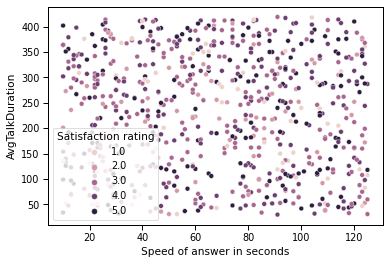

In [83]:
# Create a scatter plot
sns.scatterplot(x='Speed of answer in seconds', y='AvgTalkDuration', hue='Satisfaction rating', data=admin_calls)

# Calculate the correlation coefficient
corr = admin_calls['Speed of answer in seconds'].corr(admin_calls['AvgTalkDuration'])
print(f"Correlation coefficient: {corr}")


In [84]:
#least correaltion between Avg talk duration and Speed of answers in sec

In [85]:
# filter data for calls related to Admin Support
admin_calls = df_Call_CentreInfo[df_Call_CentreInfo['Topic'] == 'Technical Support']
admin_calls = admin_calls[df_Call_CentreInfo['Resolved'] == 'Y']
admin_calls=admin_calls.dropna()

In [86]:
admin_calls['AvgTalkDuration'] = pd.to_numeric(admin_calls['AvgTalkDuration'])

In [87]:
talk_duration_avg_tech=admin_calls['AvgTalkDuration'].mean()
asa_avg_tech = admin_calls['Speed of answer in seconds'].mean()

# print results
print("Average Speed of Answer:", asa_avg_tech)
print("Average Talk Duration:", talk_duration_avg_tech)

Average Speed of Answer: 68.23097826086956
Average Talk Duration: 225.03125


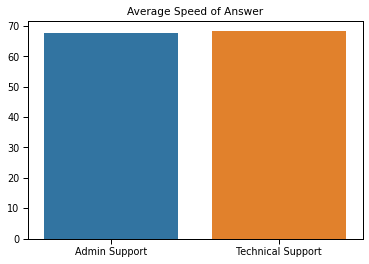

In [88]:
import seaborn as sns

# create bar chart
sns.barplot(x=['Admin Support', 'Technical Support'],
            y=[asa_avg, asa_avg_tech])


# add title
plt.title('Average Speed of Answer')

# show plot
plt.show()

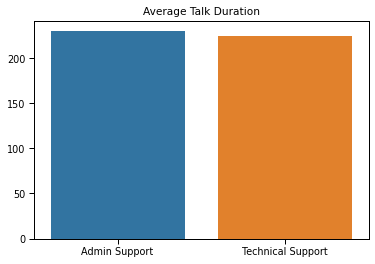

In [89]:
import seaborn as sns

# create bar chart
sns.barplot(x=['Admin Support', 'Technical Support'],
            y=[talk_duration_avg, talk_duration_avg_tech])


# add title
plt.title('Average Talk Duration')

# show plot
plt.show()

Correlation coefficient: 0.04257353989200357


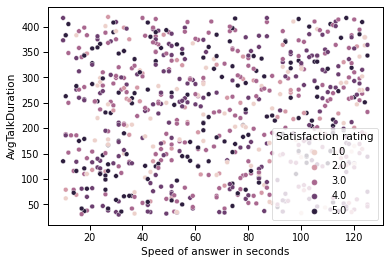

In [90]:
# Create a scatter plot
sns.scatterplot(x='Speed of answer in seconds', y='AvgTalkDuration', hue='Satisfaction rating', data=admin_calls)

# Calculate the correlation coefficient
corr = admin_calls['Speed of answer in seconds'].corr(admin_calls['AvgTalkDuration'])
print(f"Correlation coefficient: {corr}")

In [101]:
# Building the test and train datasets

In [102]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [103]:
df = df_CustomerInfo

In [104]:
df = df.apply(lambda x: object_to_int(x))

In [105]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
numTechTickets      0.357100
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
StreamingTV         0.063254
StreamingMovies     0.060860
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
customerID         -0.017858
numAdminTickets    -0.019562
InternetService    -0.047097
DeviceProtection   -0.066193
OnlineBackup       -0.082307
Partner            -0.149982
Dependents         -0.163128
TechSupport        -0.164716
OnlineSecurity     -0.171270
TotalCharges       -0.199484
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<Figure size 1008x504 with 0 Axes>

In [106]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [108]:
def distplot(feature, frame, color='b'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

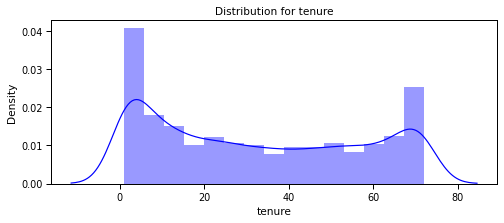

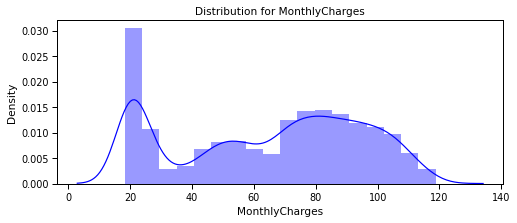

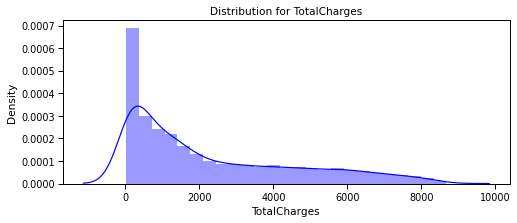

In [109]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

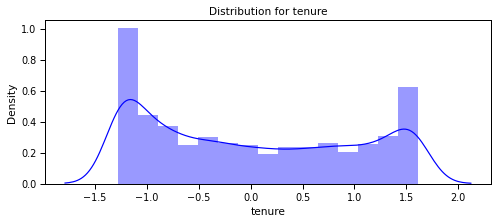

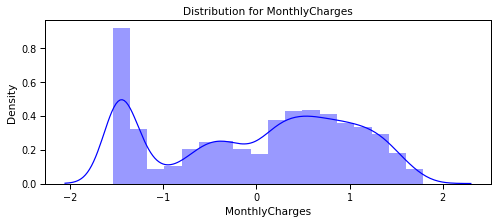

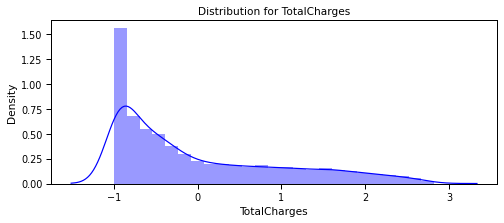

In [110]:
#Standardizing numeric attributes
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in numerical_cols: distplot(feat, df_std, color='b')

In [111]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding
cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [112]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [113]:
#Machine Learning Model and Evaluation

#1.KNN
#2.Random forest
#3.Logistic Regression
#4.Decison Tree Classifier
#5.Support Vector Classifier
#6.Naive Bayes Classifier
#7.XGBoost classifier
#8.Gradientboost Classifier

In [114]:
def print_confusion_matrix(title,test_var,train_var):
    plt.figure(figsize=(4,3))
    sns.heatmap(confusion_matrix(test_var, train_var),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
    plt.title(title,fontsize=14)
    plt.show()
    return

In [115]:
def print_roc_curve(title,label,test_var_X,test_var_y,model):
    y_pred_prob = model.predict_proba(test_var_X)[:,1]
    fpr_rf, tpr_rf, thresholds = roc_curve(test_var_y, y_pred_prob)
    plt.plot([0, 1], [0, 1], 'k--' )
    plt.plot(fpr_rf, tpr_rf, label=label,color = "r")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title,fontsize=16)
    plt.show();
    return

KNN accuracy: 0.7251184834123223
              precision    recall  f1-score   support

           0       0.74      0.96      0.84      1549
           1       0.40      0.07      0.11       561

    accuracy                           0.73      2110
   macro avg       0.57      0.51      0.48      2110
weighted avg       0.65      0.73      0.64      2110

KNN Confuson Matrix
[[1493   56]
 [ 524   37]]


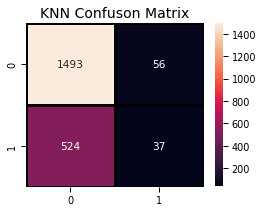

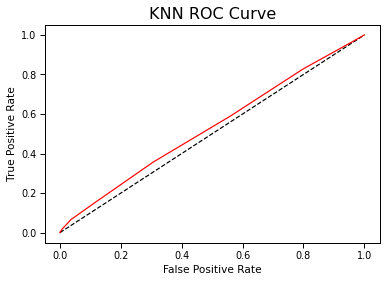

In [116]:
#KNN
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)
print(classification_report(y_test, predicted_y))

#Confusion matrix
print("KNN Confuson Matrix")
print(confusion_matrix(y_test, predicted_y))
print_confusion_matrix("KNN Confuson Matrix",y_test,predicted_y)

#ROC Curve
print_roc_curve("KNN ROC Curve","KNN",X_test,y_test,knn_model)

Random Forest accuracy: 0.8587677725118483
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1549
           1       0.79      0.64      0.71       561

    accuracy                           0.86      2110
   macro avg       0.83      0.79      0.81      2110
weighted avg       0.85      0.86      0.85      2110

Random Forest Confuson Matrix
[[1455   94]
 [ 204  357]]


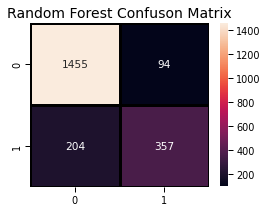

AUC-ROC score: 0.7878396619519924


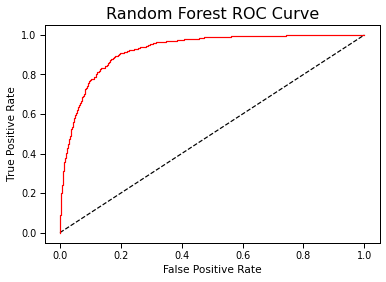

In [118]:
#Random forest
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print ("Random Forest accuracy:",metrics.accuracy_score(y_test, prediction_test))
print(classification_report(y_test, prediction_test))
#Confusion matrix
print("Random Forest Confuson Matrix")
print(confusion_matrix(y_test, prediction_test))
print_confusion_matrix("Random Forest Confuson Matrix",y_test,prediction_test)


#ROC Curve
auc_roc = roc_auc_score(y_test, prediction_test)
print('AUC-ROC score:', auc_roc)
print_roc_curve("Random Forest ROC Curve","Random Forest",X_test,y_test,model_rf)

Logistic Regression accuracy is : 0.862085308056872
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1549
           1       0.75      0.71      0.73       561

    accuracy                           0.86      2110
   macro avg       0.83      0.82      0.82      2110
weighted avg       0.86      0.86      0.86      2110

Logistic Regression Confuson Matrix
[[1418  131]
 [ 160  401]]


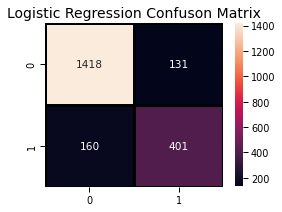

AUC-ROC score: 0.8151121590722092


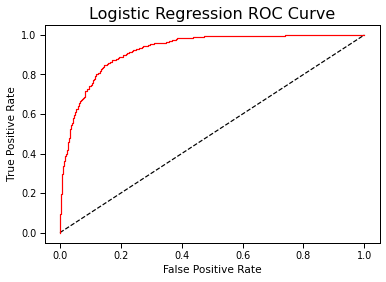

In [119]:
#Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)
#Confusion matrix
print("Logistic Regression Confuson Matrix")
print(confusion_matrix(y_test, lr_pred))
print_confusion_matrix("Logistic Regression Confuson Matrix",y_test,lr_pred)

#ROC Curve
auc_roc = roc_auc_score(y_test, lr_pred)
print('AUC-ROC score:', auc_roc)
print_roc_curve("Logistic Regression ROC Curve","Logistic Regression",X_test,y_test,lr_model)

Decision Tree accuracy is : 0.8090047393364929
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1549
           1       0.64      0.63      0.64       561

    accuracy                           0.81      2110
   macro avg       0.76      0.75      0.75      2110
weighted avg       0.81      0.81      0.81      2110

Decision Tree Confuson Matrix
[[1353  196]
 [ 207  354]]


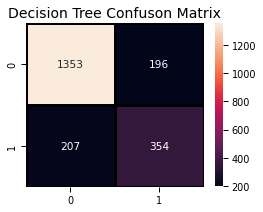

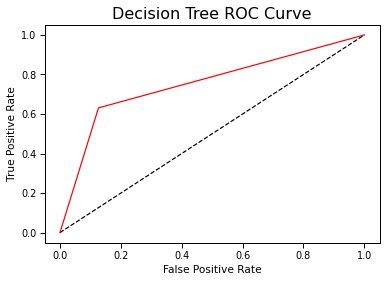

In [120]:
#Decison Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)

# Evaluate the model
print("Decision Tree accuracy is :",accuracy_dt)
print(classification_report(y_test, predictdt_y))

#Confusion matrix
print("Decision Tree Confuson Matrix")
print(confusion_matrix(y_test, predictdt_y))
print_confusion_matrix("Decision Tree Confuson Matrix",y_test,predictdt_y)

#ROC Curve
print_roc_curve("Decision Tree ROC Curve","Decision Tree",X_test,y_test,dt_model)

SVM accuracy is : 0.7341232227488151
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1549
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2110
   macro avg       0.37      0.50      0.42      2110
weighted avg       0.54      0.73      0.62      2110

SVC Confuson Matrix
[[1549    0]
 [ 561    0]]


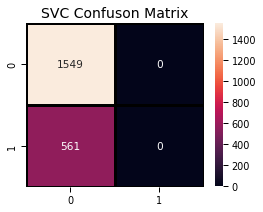

In [122]:
#SVC
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)
print(classification_report(y_test, predict_y))

#Confusion matrix
print("SVC Confuson Matrix")
print(confusion_matrix(y_test, predict_y))
print_confusion_matrix("SVC Confuson Matrix",y_test,predict_y)

#ROC Curve
#print_roc_curve("SVC ROC Curve","Decision Tree",X_test,y_test,svc_model)

Naive Bayes Classifier Accuracy: 0.8175355450236966
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1549
           1       0.62      0.81      0.70       561

    accuracy                           0.82      2110
   macro avg       0.77      0.81      0.79      2110
weighted avg       0.84      0.82      0.82      2110

Naive Bayes Classifier Confusion Matrix
[[1272  277]
 [ 108  453]]


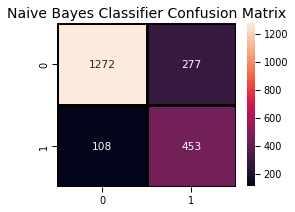

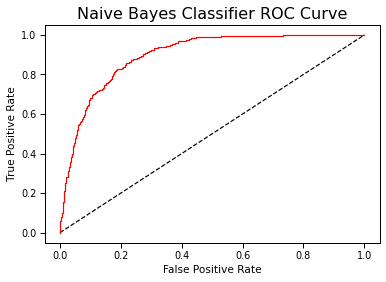

In [123]:
#Naive Bayes Classifier

# Create an Naive Bayes Classifier object
model = GaussianNB()

model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Classifier Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

#Confusion matrix
print("Naive Bayes Classifier Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print_confusion_matrix("Naive Bayes Classifier Confusion Matrix",y_test,y_pred)

#ROC Curve
print_roc_curve("Naive Bayes Classifier ROC Curve","Naive Bayes Classifier",X_test,y_test,model)

XG Boost Accuracy: 0.8464454976303317
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1549
           1       0.72      0.69      0.70       561

    accuracy                           0.85      2110
   macro avg       0.81      0.80      0.80      2110
weighted avg       0.84      0.85      0.85      2110

XG Boost Confuson Matrix
[[1399  150]
 [ 174  387]]


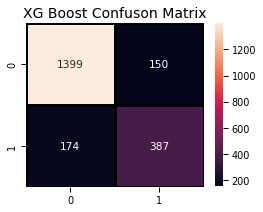

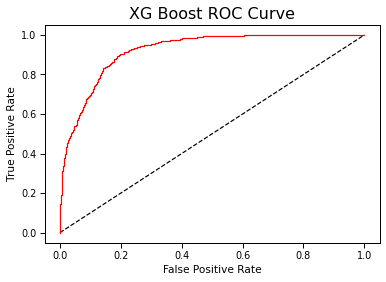

In [124]:
#XG Boost

# Create an XGBoost classifier object
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('XG Boost Accuracy:', accuracy)
print(classification_report(y_test, y_pred))

#Confusion matrix
print("XG Boost Confuson Matrix")
print(confusion_matrix(y_test, y_pred))
print_confusion_matrix("XG Boost Confuson Matrix",y_test,y_pred)

#ROC Curve
print_roc_curve("XG Boost ROC Curve","XG Boost",X_test,y_test,xgb_model)

Gradient Boosting Classifier 0.8625592417061612
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1549
           1       0.75      0.72      0.73       561

    accuracy                           0.86      2110
   macro avg       0.83      0.82      0.82      2110
weighted avg       0.86      0.86      0.86      2110

Gradient Boosting Confuson Matrix
[[1418  131]
 [ 159  402]]


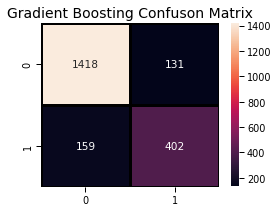

AUC-ROC score: 0.8160034246693572


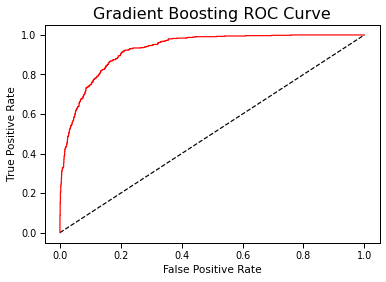

In [125]:
#Gradientboost Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))
print(classification_report(y_test, gb_pred))
#Confusion matrix
print("Gradient Boosting Confuson Matrix")
print(confusion_matrix(y_test, gb_pred))
print_confusion_matrix("Gradient Boosting Confuson Matrix",y_test,gb_pred)
#ROC Curve
auc_roc = roc_auc_score(y_test, gb_pred)
print('AUC-ROC score:', auc_roc)
print_roc_curve("Gradient Boosting ROC Curve","Gradient Boosting",X_test,y_test,gb)

In [ ]:
#Based on the evaluation results, the best performing models in terms of accuracy are the Random Forest Classifier and the Logistic Regression Classifier with accuracy scores of 0.86.
#The worst performing model is the Support Vector Classifier (SVC) with an accuracy score of 0.73.
#Based on the precision, recall and F1-score, the best model is Logistic Regression, with a precision of 0.75 and recall of 0.72 for identifying the churned customers. The Random Forest Classifier also performed well, with a precision of 0.79 and recall of 0.64. However, it's worth noting that the performance of the models might vary based on the specific needs of the problem and the costs associated with false positives and false negatives.
#The AUC-ROC score for the Logistic Regression model is 0.8174 and the AUC-ROC score for the Random Forest Classifier is 0.7905. Therefore, the Logistic Regression model has a higher AUC-ROC score compared to the Random Forest Classifier, indicating that the Logistic Regression model has a better overall performance in terms of correctly identifying true positive and true negative cases.
#Overall Logistic Regression Classifier seem to be the best models for this task based on the evaluation results.
